In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

### Concat 2018 and 2019 data

In [2]:
def combine_csv_files(directory, output_file, prefix='vcb_rates_2018_', extension='.csv'):
    # List all files in the directory
    all_files = os.listdir(directory)
    
    # Filter files by prefix and extension
    csv_files = [os.path.join(directory, file) for file in all_files if file.startswith(prefix) and file.endswith(extension)]
    
    # Read and concatenate all CSV files
    df_list = [pd.read_csv(file) for file in csv_files]
    combined_df = pd.concat(df_list, ignore_index=True)
    combined_df.to_csv(output_file, index=False)

In [3]:
directory = '../crawl/data/vcb/2018'
output_file = '../crawl/data/vcb/vcb_rates_2018.csv'
combine_csv_files(directory, output_file, prefix='vcb_rates_2018_')

In [4]:
directory = '../crawl/data/vcb/2019'
output_file = '../crawl/data/vcb/vcb_rates_2019.csv'
combine_csv_files(directory, output_file, prefix='vcb_rates_2019_')

### Combine them all and save the USD only

In [5]:
data_dir = '../crawl/data/vcb'
years = range(2018, 2025)

In [6]:
full_df = []
for year in years:
    # Construct the filename by replacing the year
    filename = f'{data_dir}/vcb_rates_{year}.csv'
    df = pd.read_csv(filename)
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    full_df.append(df)

all_data = pd.concat(full_df, ignore_index=True)
all_data.sort_values(by='Date')
all_data

,Date,Currency Name,Currency Code,Buy Cash,Buy Transfer,Sell
0,2018-01-01,AUST.DOLLAR,AUD,17478.67,17589.33,17771.41
1,2018-01-01,CANADIAN DOLLAR,CAD,17785.10,17951.85,18209.85
2,2018-01-01,SWISS FRANCE,CHF,22906.08,23072.73,23397.12
3,2018-01-01,DANISH KRONE,DKK,-,3590.19,3702.80
4,2018-01-01,EURO,EUR,26911.34,26997.39,27263.40
...,...,...,...,...,...,...
45082,2024-05-19,SAUDI RIAL,SAR,-,6767.26,7037.78
45083,2024-05-19,SWEDISH KRONA,SEK,-,2325.99,2424.74
45084,2024-05-19,SINGAPORE DOLLAR,SGD,18433.15,18619.34,19216.61
45085,2024-05-19,THAILAND BAHT,THB,621.40,690.45,716.88


In [7]:
# Keep the USD data only
df_usd = all_data[all_data['Currency Code'] == 'USD'].reset_index(drop=True)
df_usd

,Date,Currency Name,Currency Code,Buy Cash,Buy Transfer,Sell
0,2018-01-01,US DOLLAR,USD,22625.00,22655.0,22735.0
1,2018-01-02,US DOLLAR,USD,22645.00,22675.0,22745.0
2,2018-01-03,US DOLLAR,USD,22645.00,22675.0,22745.0
3,2018-01-04,US DOLLAR,USD,22645.00,22675.0,22745.0
4,2018-01-05,US DOLLAR,USD,22645.00,22675.0,22745.0
...,...,...,...,...,...,...
2325,2024-05-15,US DOLLAR,USD,25152.00,25182.0,25482.0
2326,2024-05-16,US DOLLAR,USD,25122.00,25152.0,25452.0
2327,2024-05-17,US DOLLAR,USD,25220.00,25250.0,25450.0
2328,2024-05-18,US DOLLAR,USD,25220.00,25250.0,25450.0


In [8]:
# Check to see if any duplicate date (crawling error)
duplicates = df_usd['Date'].duplicated(keep=False)
# duplicate_rows = df_usd[duplicates] # Get duplicate rows
print(f"There are {duplicates.sum()} duplicate date")

There are 0 duplicate date


In [9]:
# Check null value
null_values = df_usd.isnull().sum()
print(f"Null values in each column: \n{null_values}")

Null values in each column: 
Date             0
Currency Name    0
Currency Code    0
Buy Cash         0
Buy Transfer     0
Sell             0
dtype: int64


In [10]:
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2330 non-null   datetime64[ns]
 1   Currency Name  2330 non-null   object        
 2   Currency Code  2330 non-null   object        
 3   Buy Cash       2330 non-null   object        
 4   Buy Transfer   2330 non-null   float64       
 5   Sell           2330 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 109.3+ KB


In [11]:
# Change Buy Cash to float
df_usd['Buy Cash'] = df_usd['Buy Cash'].replace('.00', '').astype(float)
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2330 non-null   datetime64[ns]
 1   Currency Name  2330 non-null   object        
 2   Currency Code  2330 non-null   object        
 3   Buy Cash       2330 non-null   float64       
 4   Buy Transfer   2330 non-null   float64       
 5   Sell           2330 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 109.3+ KB


In [12]:
#Drop unused columns
df_usd.drop(columns=['Currency Name', 'Currency Code'], inplace=True)
df_usd

,Date,Buy Cash,Buy Transfer,Sell
0,2018-01-01,22625.0,22655.0,22735.0
1,2018-01-02,22645.0,22675.0,22745.0
2,2018-01-03,22645.0,22675.0,22745.0
3,2018-01-04,22645.0,22675.0,22745.0
4,2018-01-05,22645.0,22675.0,22745.0
...,...,...,...,...
2325,2024-05-15,25152.0,25182.0,25482.0
2326,2024-05-16,25122.0,25152.0,25452.0
2327,2024-05-17,25220.0,25250.0,25450.0
2328,2024-05-18,25220.0,25250.0,25450.0


In [13]:
# Save for later use
df_usd.sort_values(by='Date').to_csv('../crawl/data/clean/df_usd.csv', index=False)

### Visualize USD exchange rate data

In [2]:
df_usd = pd.read_csv('../crawl/data/clean/df_usd.csv')
# Ensure 'Date' is in datetime format
df_usd['Date'] = pd.to_datetime(df_usd['Date'])

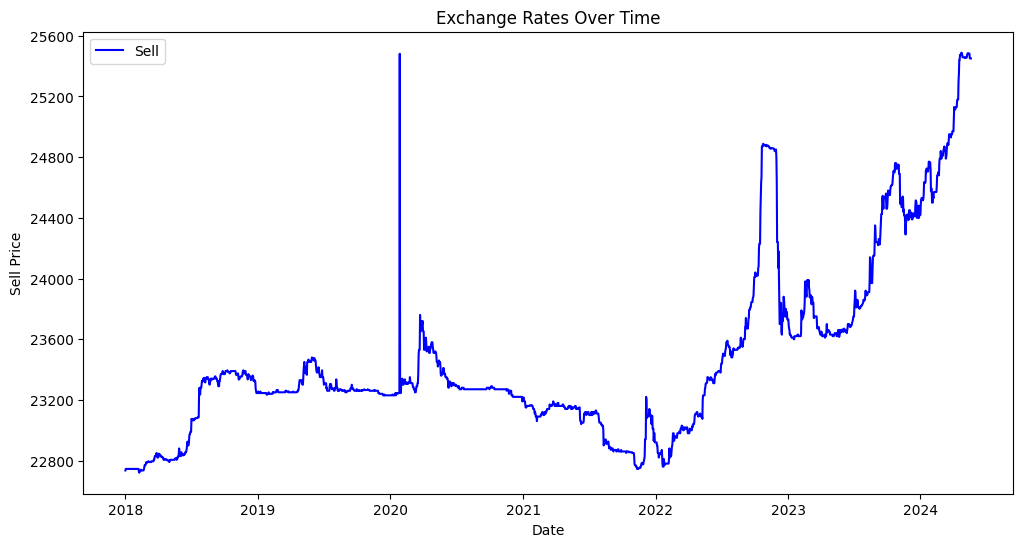

In [3]:
# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_usd['Date'], df_usd['Sell'], label='Sell', color='blue')

# Customize the y-axis to avoid thick lines
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(prune='both'))

plt.xlabel('Date')
plt.ylabel('Sell Price')
plt.title('Exchange Rates Over Time')
plt.legend()
plt.show()

In [4]:
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2330 non-null   datetime64[ns]
 1   Buy Cash      2330 non-null   float64       
 2   Buy Transfer  2330 non-null   float64       
 3   Sell          2330 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 72.9 KB


### Map microeconomics feature to exchange df
- Inflation rates data is record monthly (both VN and USA)
- Unemployed rates data is monthly in USA and quarterly in VN &#8594; Calculate USA data to quarterly 
- Foreign Direct Investment (FDI) data is monthly in VN and quarterly in USA &#8594; Calculate VN data to quarterly 

**1. Inflation rates**

In [5]:
df_inflation = pd.read_csv('../crawl/data/trading_economics/inflation_rate_month.csv')
df_inflation['Date'] = pd.to_datetime(df_inflation['month'], format='%d-%m-%y')
df_inflation

,month,inflation_rate_vn,inflation_rate_us,Date
0,01-01-18,0.0265,0.0210,2018-01-01
1,01-02-18,0.0315,0.0220,2018-02-01
2,01-03-18,0.0266,0.0240,2018-03-01
3,01-04-18,0.0275,0.0250,2018-04-01
4,01-05-18,0.0386,0.0280,2018-05-01
...,...,...,...,...
72,01-01-24,0.0337,0.0310,2024-01-01
73,01-02-24,0.0398,0.0320,2024-02-01
74,01-03-24,0.0397,0.0348,2024-03-01
75,01-04-24,0.0440,0.0340,2024-04-01


In [6]:
# Forward-fill monthly data to daily frequency
df_inflation_daily = df_inflation.set_index('Date').resample('D').ffill().reset_index()
df_inflation_daily.drop(columns=['month'], inplace=True)
df_inflation_daily

,Date,inflation_rate_vn,inflation_rate_us
0,2018-01-01,0.0265,0.021
1,2018-01-02,0.0265,0.021
2,2018-01-03,0.0265,0.021
3,2018-01-04,0.0265,0.021
4,2018-01-05,0.0265,0.021
...,...,...,...
2308,2024-04-27,0.0440,0.034
2309,2024-04-28,0.0440,0.034
2310,2024-04-29,0.0440,0.034
2311,2024-04-30,0.0440,0.034


**2. Unemployed rates**

In [7]:
df_vn_unemploy = pd.read_csv('../crawl/data/trading_economics/vn_unemploy_rate_quarter.csv')
df_vn_unemploy['Date'] = pd.to_datetime(df_vn_unemploy['month'], format='%d-%m-%y')
df_vn_unemploy.drop(columns=['month'], inplace=True)

df_us_unemploy = pd.read_csv('../crawl/data/trading_economics/usa_unemploy_rate_month.csv')
df_us_unemploy['Date'] = pd.to_datetime(df_us_unemploy['month'], format='%d-%m-%y')
df_us_unemploy.drop(columns=['month'], inplace=True)

df_us_unemploy

,unemploy_rate_us,Date
0,0.040,2018-01-01
1,0.041,2018-02-01
2,0.040,2018-03-01
3,0.040,2018-04-01
4,0.038,2018-05-01
...,...,...
72,0.037,2024-01-01
73,0.039,2024-02-01
74,0.038,2024-03-01
75,NaN,2024-04-01


In [8]:
# df_us_unemploy.info()
# Aggregate monthly data to quarterly frequency
df_unemploy_monthly_quarterly = df_us_unemploy.set_index('Date').resample('QE').mean().reset_index()
df_unemploy_monthly_quarterly['Date'] = df_unemploy_monthly_quarterly['Date'].dt.to_period('Q').dt.start_time
df_unemploy_monthly_quarterly

,Date,unemploy_rate_us
0,2018-01-01,0.040333
1,2018-04-01,0.039333
2,2018-07-01,0.037667
3,2018-10-01,0.038333
4,2019-01-01,0.038667
5,2019-04-01,0.036333
6,2019-07-01,0.036000
7,2019-10-01,0.036000
8,2020-01-01,0.038333
9,2020-04-01,0.130667


In [9]:
# Merge the DataFrames for plotting
df_unemploy_combine = pd.merge(df_unemploy_monthly_quarterly, df_vn_unemploy, on='Date', how='outer', suffixes=('_usa', '_vn'))
df_unemploy_combine

,Date,unemploy_rate_us,unemploy_rate_vn
0,2018-01-01,0.040333,0.0219
1,2018-04-01,0.039333,0.0220
2,2018-07-01,0.037667,0.0218
3,2018-10-01,0.038333,0.0219
4,2019-01-01,0.038667,0.0217
5,2019-04-01,0.036333,0.0216
6,2019-07-01,0.036000,0.0217
7,2019-10-01,0.036000,0.0215
8,2020-01-01,0.038333,0.0222
9,2020-04-01,0.130667,0.0273


In [10]:
# Forward-fill quarterly data to daily frequency
df_unemploy_daily = df_unemploy_combine.set_index('Date').resample('D').ffill().reset_index()
df_unemploy_daily

,Date,unemploy_rate_us,unemploy_rate_vn
0,2018-01-01,0.040333,0.0219
1,2018-01-02,0.040333,0.0219
2,2018-01-03,0.040333,0.0219
3,2018-01-04,0.040333,0.0219
4,2018-01-05,0.040333,0.0219
...,...,...,...
2308,2024-04-27,NaN,NaN
2309,2024-04-28,NaN,NaN
2310,2024-04-29,NaN,NaN
2311,2024-04-30,NaN,NaN


**3. Foreign Direct Investment (FDI)**

In [11]:
df_us_fdi = pd.read_csv('../crawl/data/trading_economics/usa_fdi_quarter.csv')
df_us_fdi['Date'] = pd.to_datetime(df_us_fdi['month'], format='%d-%m-%y')
df_us_fdi.drop(columns=['month'], inplace=True)

df_vn_fdi = pd.read_csv('../crawl/data/trading_economics/vn_fdi_month.csv')
df_vn_fdi['Date'] = pd.to_datetime(df_vn_fdi['month'], format='%d-%m-%y')
df_vn_fdi.drop(columns=['month'], inplace=True)

df_vn_fdi

,fdi_vn,Date
0,1.05,2018-01-01
1,1.70,2018-02-01
2,3.89,2018-03-01
3,5.10,2018-04-01
4,6.75,2018-05-01
...,...,...
72,1.48,2024-01-01
73,2.80,2024-02-01
74,4.60,2024-03-01
75,6.28,2024-04-01


In [12]:
# Aggregate monthly data to quarterly frequency
df_fdi_monthly_quarterly = df_vn_fdi.set_index('Date').resample('QE').mean().reset_index()
df_fdi_monthly_quarterly['Date'] = df_fdi_monthly_quarterly['Date'].dt.to_period('Q').dt.start_time
df_fdi_monthly_quarterly

,Date,fdi_vn
0,2018-01-01,2.213333
1,2018-04-01,6.740000
2,2018-07-01,11.450000
3,2018-10-01,16.900000
4,2019-01-01,2.750000
5,2019-04-01,7.366667
6,2019-07-01,12.243333
7,2019-10-01,18.070000
8,2020-01-01,2.633333
9,2020-04-01,6.833333


In [13]:
# Merge the DataFrames for plotting
df_fdi_combine = pd.merge(df_fdi_monthly_quarterly, df_us_fdi, on='Date', how='outer', suffixes=('_usa', '_vn'))
df_fdi_combine

,Date,fdi_vn,fdi_us
0,2018-01-01,2.213333,43.0
1,2018-04-01,6.740000,53.9
2,2018-07-01,11.450000,54.5
3,2018-10-01,16.900000,52.2
4,2019-01-01,2.750000,45.9
5,2019-04-01,7.366667,50.3
6,2019-07-01,12.243333,48.3
7,2019-10-01,18.070000,52.1
8,2020-01-01,2.633333,30.4
9,2020-04-01,6.833333,24.7


In [14]:
# Forward-fill quarterly data to daily frequency
df_fdi_daily = df_fdi_combine.set_index('Date').resample('D').ffill().reset_index()
df_fdi_daily

,Date,fdi_vn,fdi_us
0,2018-01-01,2.213333,43.0
1,2018-01-02,2.213333,43.0
2,2018-01-03,2.213333,43.0
3,2018-01-04,2.213333,43.0
4,2018-01-05,2.213333,43.0
...,...,...,...
2308,2024-04-27,6.280000,NaN
2309,2024-04-28,6.280000,NaN
2310,2024-04-29,6.280000,NaN
2311,2024-04-30,6.280000,NaN


**4. Combine them all to the daily forex**

In [15]:
# Merge daily exchange rate data with monthly and quarterly daily data
df_combined = df_usd.merge(df_inflation_daily, on='Date', how='left')
df_combined = df_combined.merge(df_unemploy_daily, on='Date', how='left')
df_combined = df_combined.merge(df_fdi_daily, on='Date', how='left')
df_combined

,Date,Buy Cash,Buy Transfer,Sell,inflation_rate_vn,inflation_rate_us,unemploy_rate_us,unemploy_rate_vn,fdi_vn,fdi_us
0,2018-01-01,22625.0,22655.0,22735.0,0.0265,0.021,0.040333,0.0219,2.213333,43.0
1,2018-01-02,22645.0,22675.0,22745.0,0.0265,0.021,0.040333,0.0219,2.213333,43.0
2,2018-01-03,22645.0,22675.0,22745.0,0.0265,0.021,0.040333,0.0219,2.213333,43.0
3,2018-01-04,22645.0,22675.0,22745.0,0.0265,0.021,0.040333,0.0219,2.213333,43.0
4,2018-01-05,22645.0,22675.0,22745.0,0.0265,0.021,0.040333,0.0219,2.213333,43.0
...,...,...,...,...,...,...,...,...,...,...
2325,2024-05-15,25152.0,25182.0,25482.0,NaN,NaN,NaN,NaN,NaN,NaN
2326,2024-05-16,25122.0,25152.0,25452.0,NaN,NaN,NaN,NaN,NaN,NaN
2327,2024-05-17,25220.0,25250.0,25450.0,NaN,NaN,NaN,NaN,NaN,NaN
2328,2024-05-18,25220.0,25250.0,25450.0,NaN,NaN,NaN,NaN,NaN,NaN


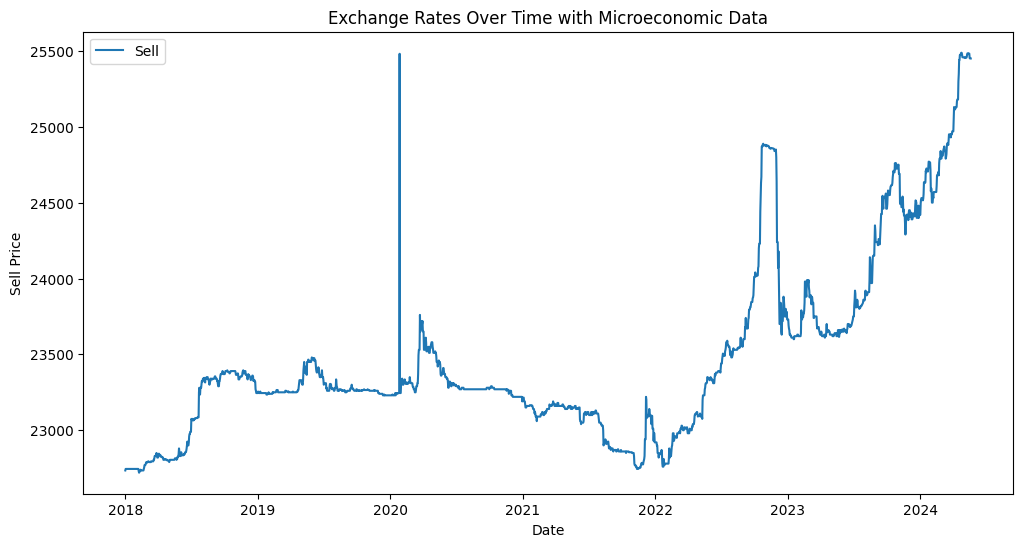

In [16]:
# Plotting the combined data
plt.figure(figsize=(12, 6))
plt.plot(df_combined['Date'], df_combined['Sell'], label='Sell')
plt.xlabel('Date')
plt.ylabel('Sell Price')
plt.title('Exchange Rates Over Time with Microeconomic Data')
plt.legend()
plt.show()

In [17]:
df_combined.sort_values(by='Date').to_csv('../crawl/data/clean/df_combine.csv', index=False)